## 1. Consolidated files in the unique DataFrame and show the total files extracted

In [3]:
import pandas as pd

all_files = pd.read_pickle("../etl/views/" + "dataset.pkl")

all_files.shape

# the last 5 rows
all_files.tail()

,code,codein,name,high,low,varBid,pctChange,bid,ask,timestamp,create_date,symbol,extracted_at,id,value,key1,key2,key3
2868,BRL,NPR,Real Brasileiro/Rúpia Nepalesa,26.03,26.01,-0.11,-0.4,25.72,26.33,1716342722,2024-05-21 22:52:02,BRL-NPR,2024-05-22 03:10:35,BRL-NPR-1716347434,NaN,NaN,NaN,NaN
2869,USD,BRL,Dólar Americano/Real Brasileiro,5.1764,5.1304,0.0207,0.4,5.1645,5.1652,1716584393,2024-05-24 17:59:53,USD-BRL,2024-05-25 03:27:19,USD-BRL-1716607639,NaN,NaN,NaN,NaN
2870,USD,UGX,Dólar Americano/Shilling Ugandês,3808.67,3805.9,1.45,0.04,3765.92,3848.79,1716347415,2024-05-22 00:10:15,USD-UGX,2024-05-22 03:11:44,USD-UGX-1716347504,NaN,NaN,NaN,NaN
2871,USD,QAR,Dólar Americano/Rial Catarense,3.6415,3.6415,0,0,3.64,3.643,1716347432,2024-05-22 00:10:32,USD-QAR,2024-05-22 03:11:10,USD-QAR-1716347469,NaN,NaN,NaN,NaN
2872,BRL,OMR,Real Brasileiro/Rial Omanense,0.0747,0.0747,-0.0005,-0.62,0.0744,0.0749,1716438181,2024-05-23 01:23:01,BRL-OMR,2024-05-23 04:26:21,BRL-OMR-1716438381,NaN,NaN,NaN,NaN


## 1.1 Data set sample, list 5 files

In [4]:
all_files.head(3)

,code,codein,name,high,low,varBid,pctChange,bid,ask,timestamp,create_date,symbol,extracted_at,id,value,key1,key2,key3
0,USD,BRL,Dólar Americano/Real Brasileiro,5.4307,5.3731,0.0475,0.88,5.4224,5.424,1718650671,2024-06-17 15:57:51,USD-BRL,2024-06-17 18:58:30,USD-BRL-1718650710,NaN,NaN,NaN,NaN
1,USD,BRL,Dólar Americano/Real Brasileiro,5.2585,5.1936,0.0417,0.8,5.2443,5.2459,1717189193,2024-05-31 17:59:53,USD-BRL,2024-06-02 00:07:59,USD-BRL-1717286879,NaN,NaN,NaN,NaN
2,USD,BRLT,Dólar Americano/Real Brasileiro Turismo,5.285,5.22,0.055,1.05,5.13,5.44,1717183800,2024-05-31 16:30:00,USD-BRLT,2024-06-02 00:08:00,USD-BRLT-1717286880,NaN,NaN,NaN,NaN


# Data transformation


In [6]:
# Contributed by @Marian Gobea Alcoba ⭐

all_files["create_date"] = pd.to_datetime(all_files["create_date"])
all_files["extracted_at"] = pd.to_datetime(all_files["extracted_at"])
all_files = all_files.astype(
    {
        "code": "category",
        "codein": "category",
        "name": "category",
        "high": "float64",
        "low": "float64",
        "varBid": "float64",
        "pctChange": "float64",
        "bid": "float64",
        "ask": "float64",
    }
)

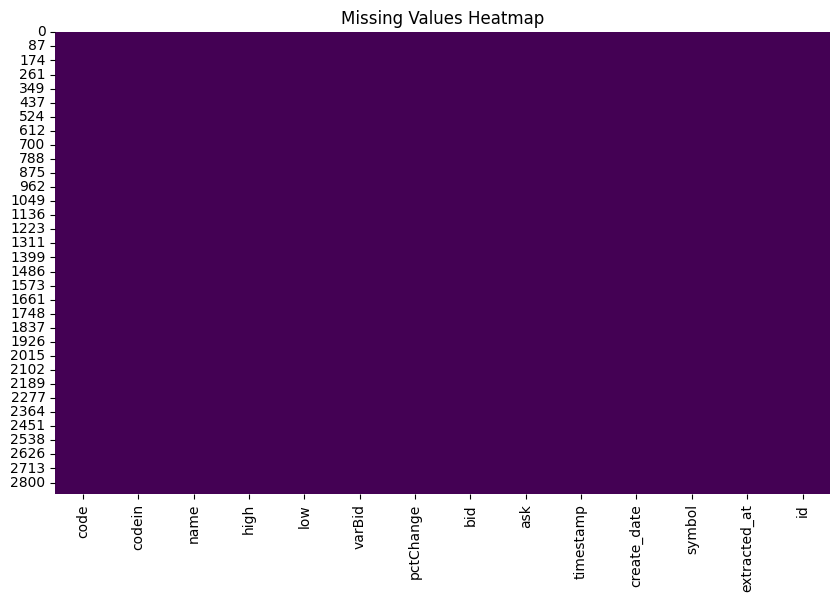

0

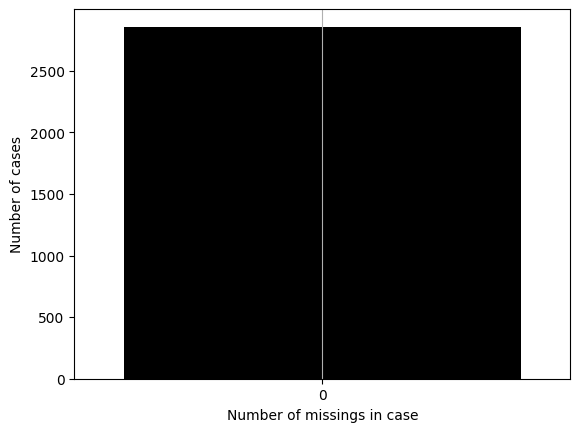

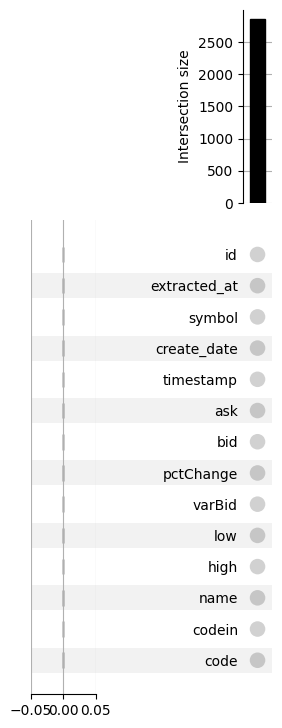

In [18]:
# Contributed by @Marian Gobea Alcoba ⭐
# @title Missing values
import missing_mga as missing

# @title Apago warnings
import warnings

warnings.filterwarnings("ignore")

all_files.missing.number_missing()
all_files.missing.number_missing_by_column()
# # @title Las columnas "value", "key1", "key2" y "key3" tienen muchos valores faltantes por lo que podrían quitarse del dataset
# all_files = all_files.drop(columns=["value", "key1", "key2", "key3"])
all_files.missing.missing_value_heatmap()
# @title La inmensa mayoria ya no tienen faltantes.
all_files.missing.missing_case_plot()
all_files.missing.missing_upsetplot()
# @title Eliminamos las filas con faltantes dado que falta practicamente el 100% de los datos
all_files = all_files.dropna()
all_files.missing.number_missing()

## 2. Change DataTypes and Reorder columns

In [9]:
# Change data types
df = all_files.astype({"ask": float, "bid": float, "varBid": float, "pctChange": float})

# Show the dataframe
df.head(3)

,code,codein,name,high,low,varBid,pctChange,bid,ask,timestamp,create_date,symbol,extracted_at,id
0,USD,BRL,Dólar Americano/Real Brasileiro,5.4307,5.3731,0.0475,0.88,5.4224,5.4240,1718650671,2024-06-17 15:57:51,USD-BRL,2024-06-17 18:58:30,USD-BRL-1718650710
1,USD,BRL,Dólar Americano/Real Brasileiro,5.2585,5.1936,0.0417,0.80,5.2443,5.2459,1717189193,2024-05-31 17:59:53,USD-BRL,2024-06-02 00:07:59,USD-BRL-1717286879
2,USD,BRLT,Dólar Americano/Real Brasileiro Turismo,5.2850,5.2200,0.0550,1.05,5.1300,5.4400,1717183800,2024-05-31 16:30:00,USD-BRLT,2024-06-02 00:08:00,USD-BRLT-1717286880


## 3. Using SQL for Data Exploration
    3.1 What is the currency with the highest ask value?

In [10]:
from pandasql import sqldf

query = """
    SELECT * FROM df order by extracted_at desc limit 1
"""

newDf = sqldf(query, locals())

newDf

,code,codein,name,high,low,varBid,pctChange,bid,ask,timestamp,create_date,symbol,extracted_at,id
0,USD,BRL,Dólar Americano/Real Brasileiro,5.4307,5.3731,0.0475,0.88,5.4224,5.424,1718650671,2024-06-17 15:57:51.000000,USD-BRL,2024-06-17 18:58:30.000000,USD-BRL-1718650710


    3.1 Disponible Data

In [11]:
from pandasql import sqldf

query = """
    SELECT * FROM df 
"""

newDf = sqldf(query, locals())

newDf

,code,codein,name,high,low,varBid,pctChange,bid,ask,timestamp,create_date,symbol,extracted_at,id
0,USD,BRL,Dólar Americano/Real Brasileiro,5.4307,5.3731,0.0475,0.88,5.4224,5.4240,1718650671,2024-06-17 15:57:51.000000,USD-BRL,2024-06-17 18:58:30.000000,USD-BRL-1718650710
1,USD,BRL,Dólar Americano/Real Brasileiro,5.2585,5.1936,0.0417,0.80,5.2443,5.2459,1717189193,2024-05-31 17:59:53.000000,USD-BRL,2024-06-02 00:07:59.000000,USD-BRL-1717286879
2,USD,BRLT,Dólar Americano/Real Brasileiro Turismo,5.2850,5.2200,0.0550,1.05,5.1300,5.4400,1717183800,2024-05-31 16:30:00.000000,USD-BRLT,2024-06-02 00:08:00.000000,USD-BRLT-1717286880
3,USD,BRL,Dólar Americano/Real Brasileiro,5.2585,5.1936,0.0417,0.80,5.2443,5.2459,1717189193,2024-05-31 17:59:53.000000,USD-BRL,2024-06-02 00:07:59.000000,USD-BRL-1717286879
4,USD,JPY,Dólar Americano/Iene Japonês,157.3700,156.5600,0.4000,0.26,157.2000,157.2200,1717179328,2024-05-31 15:15:28.000000,USD-JPY,2024-05-31 18:15:36.000000,USD-JPY-1717179336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2852,BRL,NPR,Real Brasileiro/Rúpia Nepalesa,26.0300,26.0100,-0.1100,-0.40,25.7200,26.3300,1716342722,2024-05-21 22:52:02.000000,BRL-NPR,2024-05-22 03:10:35.000000,BRL-NPR-1716347434
2853,USD,BRL,Dólar Americano/Real Brasileiro,5.1764,5.1304,0.0207,0.40,5.1645,5.1652,1716584393,2024-05-24 17:59:53.000000,USD-BRL,2024-05-25 03:27:19.000000,USD-BRL-1716607639
2854,USD,UGX,Dólar Americano/Shilling Ugandês,3808.6700,3805.9000,1.4500,0.04,3765.9200,3848.7900,1716347415,2024-05-22 00:10:15.000000,USD-UGX,2024-05-22 03:11:44.000000,USD-UGX-1716347504
2855,USD,QAR,Dólar Americano/Rial Catarense,3.6415,3.6415,0.0000,0.00,3.6400,3.6430,1716347432,2024-05-22 00:10:32.000000,USD-QAR,2024-05-22 03:11:10.000000,USD-QAR-1716347469


## 4. Using SQL + Matplotlib for Data Viz
    4.1 What is the TOP 10 Most Value Currency considering BRL?

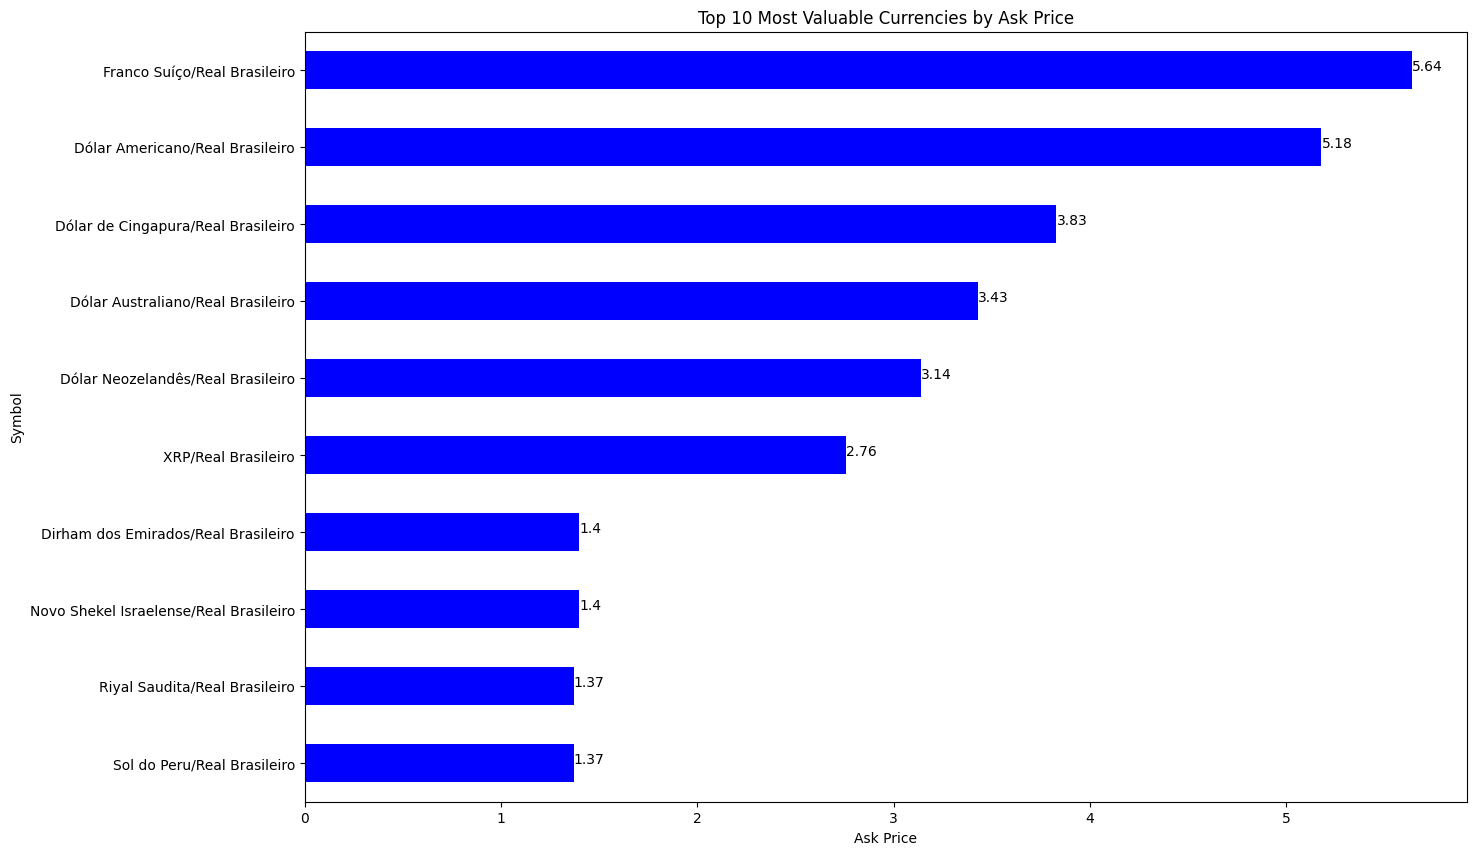

In [12]:
import matplotlib.pyplot as plt

query = """
    SELECT 
        name
        ,round(avg(ask),2) AvgAsk
    FROM df 
    where codein = 'BRL'
    and not code in ('BTC', 'ETH', 'LTC', 'DOGE')
    group by name
    order by avg(ask) desc limit 10
"""

newDf = sqldf(query, locals())
newDf.sort_values(by="AvgAsk", ascending=True, inplace=True)

AvgAskByCurrency = newDf.plot(
    kind="barh",
    x="name",
    y="AvgAsk",
    figsize=(15, 10),
    legend=False,
    color="blue",
    title="Top 10 Most Valuable Currencies by Ask Price",
    xlabel="Ask Price",
    ylabel="Symbol",
)


# Adicionando rótulos aos dados
for index, value in enumerate(newDf["AvgAsk"]):
    plt.text(value, index, str(value))

# Exibir o gráfico
plt.show()

4.2 What is the TOP 10 locations BRL has + value?

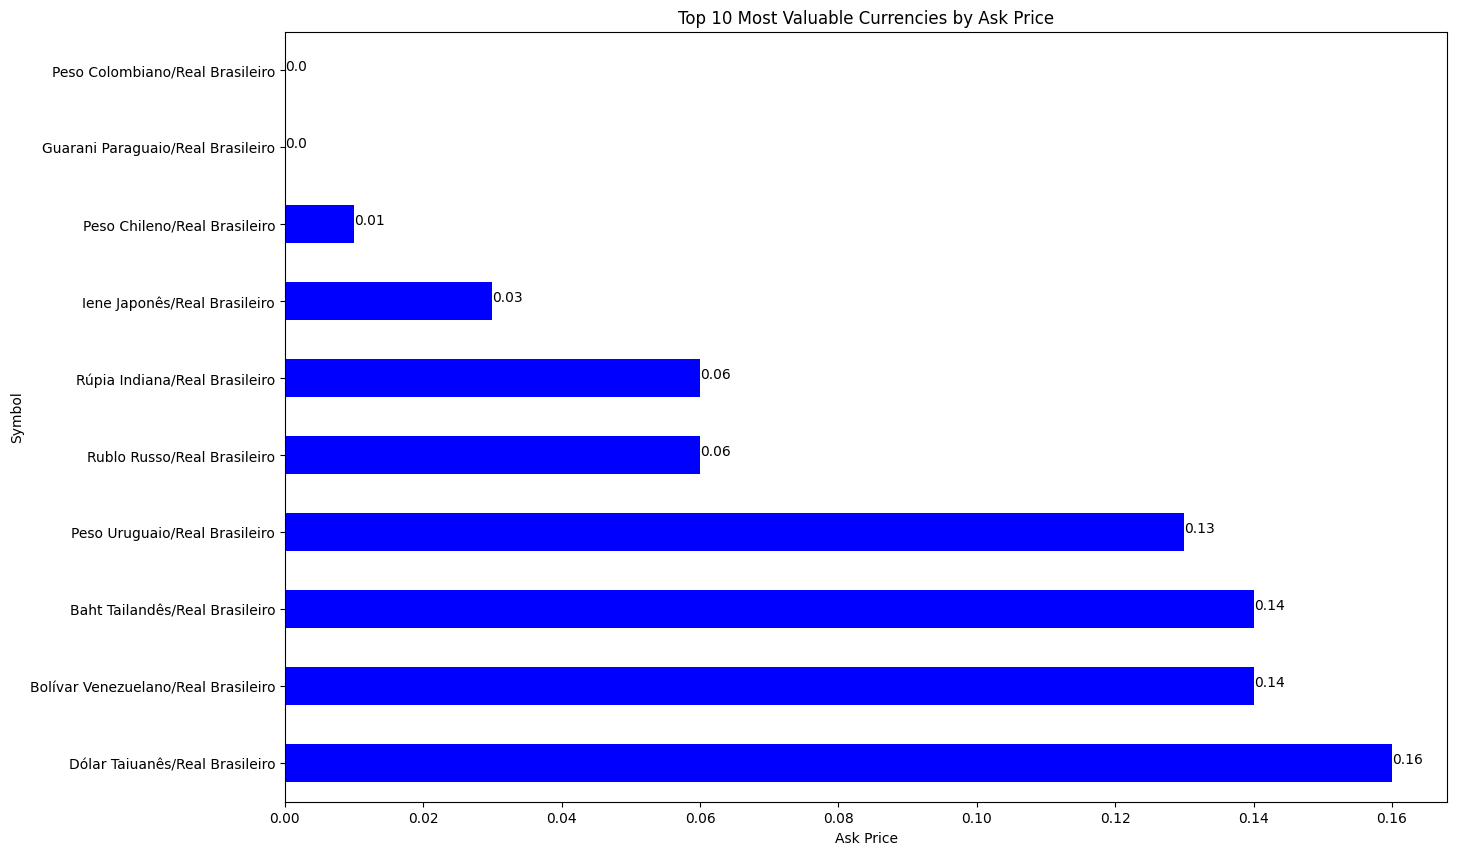

In [13]:
import matplotlib.pyplot as plt

query = """
    SELECT 
        name
        ,round(avg(ask),2) AvgAsk
    FROM df 
    where codein = 'BRL'
    and not code in ('BTC', 'ETH', 'LTC')
    group by name
    order by avg(ask) limit 10
"""

newDf = sqldf(query, locals())
newDf.sort_values(by="AvgAsk", ascending=False, inplace=True)

AvgAskByCurrency = newDf.plot(
    kind="barh",
    x="name",
    y="AvgAsk",
    figsize=(15, 10),
    legend=False,
    color="blue",
    title="Top 10 Most Valuable Currencies by Ask Price",
    xlabel="Ask Price",
    ylabel="Symbol",
)


# Adicionando rótulos aos dados
for index, value in enumerate(newDf["AvgAsk"]):
    plt.text(value, index, str(value))

# Exibir o gráfico
plt.show()

4.3 What the top 10 like BRL in value?

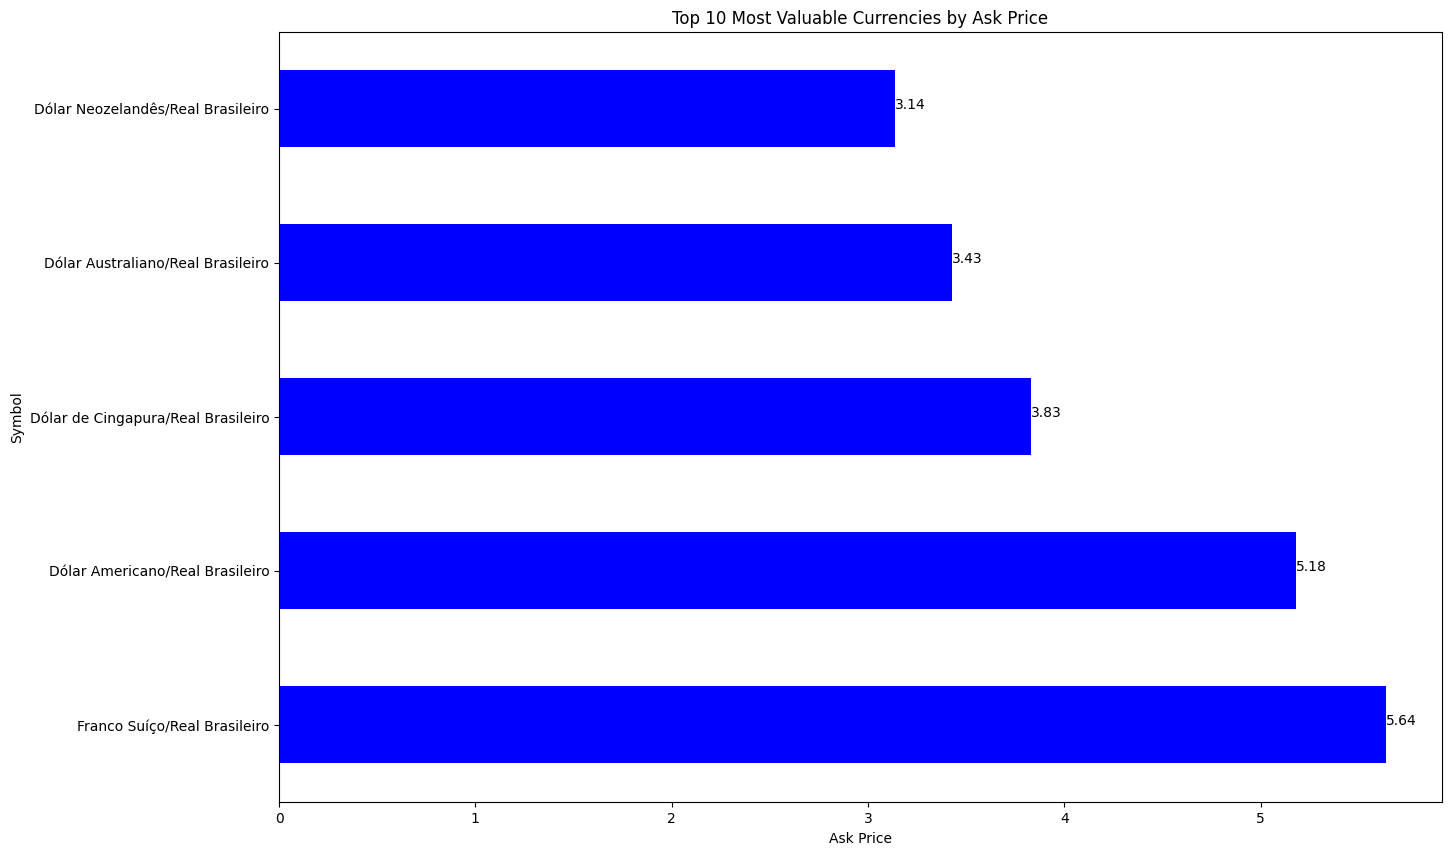

In [14]:
import matplotlib.pyplot as plt

query = """
    SELECT 
        name
        ,round(avg(ask),2) AvgAsk
    FROM df 
    where codein = 'BRL'
    and not code in ('BTC', 'ETH', 'LTC', 'DOGE')
    and ask >=1
    group by name
    order by avg(ask) desc limit 5
"""

newDf = sqldf(query, locals())
newDf.sort_values(by="AvgAsk", ascending=False, inplace=True)

AvgAskByCurrency = newDf.plot(
    kind="barh",
    x="name",
    y="AvgAsk",
    figsize=(15, 10),
    legend=False,
    color="blue",
    title="Top 10 Most Valuable Currencies by Ask Price",
    xlabel="Ask Price",
    ylabel="Symbol",
)


# Adicionando rótulos aos dados
for index, value in enumerate(newDf["AvgAsk"]):
    plt.text(value, index, str(value))

# Exibir o gráfico
plt.show()

4.4 Average Ask By Day

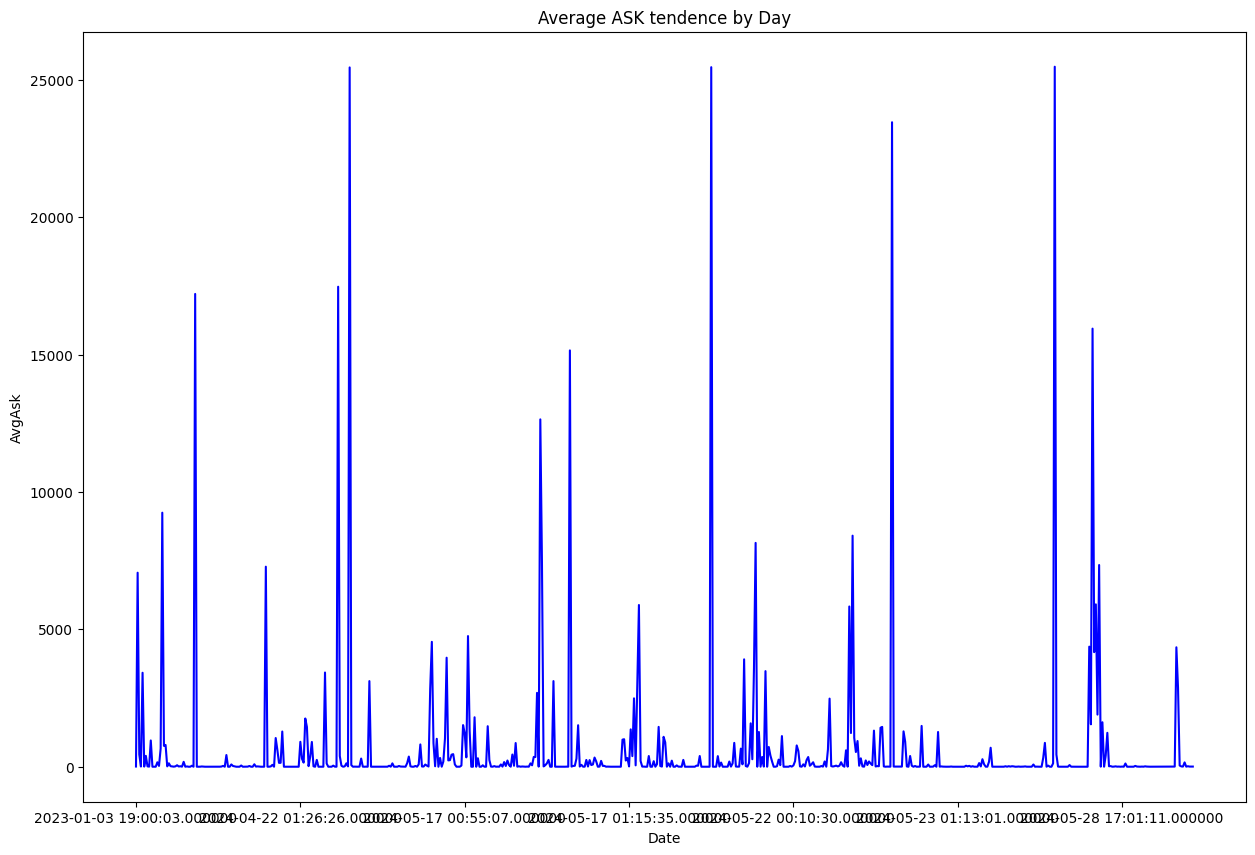

In [15]:
import matplotlib.pyplot as plt

## Query to get the average ASK and BID by day
query = """
    SELECT 
        create_date DT_REF
        ,round(avg(ask),2) AvgAsk
        ,round(avg(bid),2) Avgbid
    FROM df 
    where not code in ('BTC', 'ETH', 'LTC', 'DOGE')
    group by 1
    order by 1 
"""

newDf = sqldf(query, locals())
newDf.sort_values(by="DT_REF", ascending=True, inplace=True)

cht = newDf.plot(
    kind="line",
    x="DT_REF",
    y="AvgAsk",
    figsize=(15, 10),
    legend=False,
    color="blue",
    title="Average ASK tendence by Day",
    xlabel="Date",
    ylabel="AvgAsk",
)

# exibir o grafico
plt.show()

4.5 Average Bid By Day

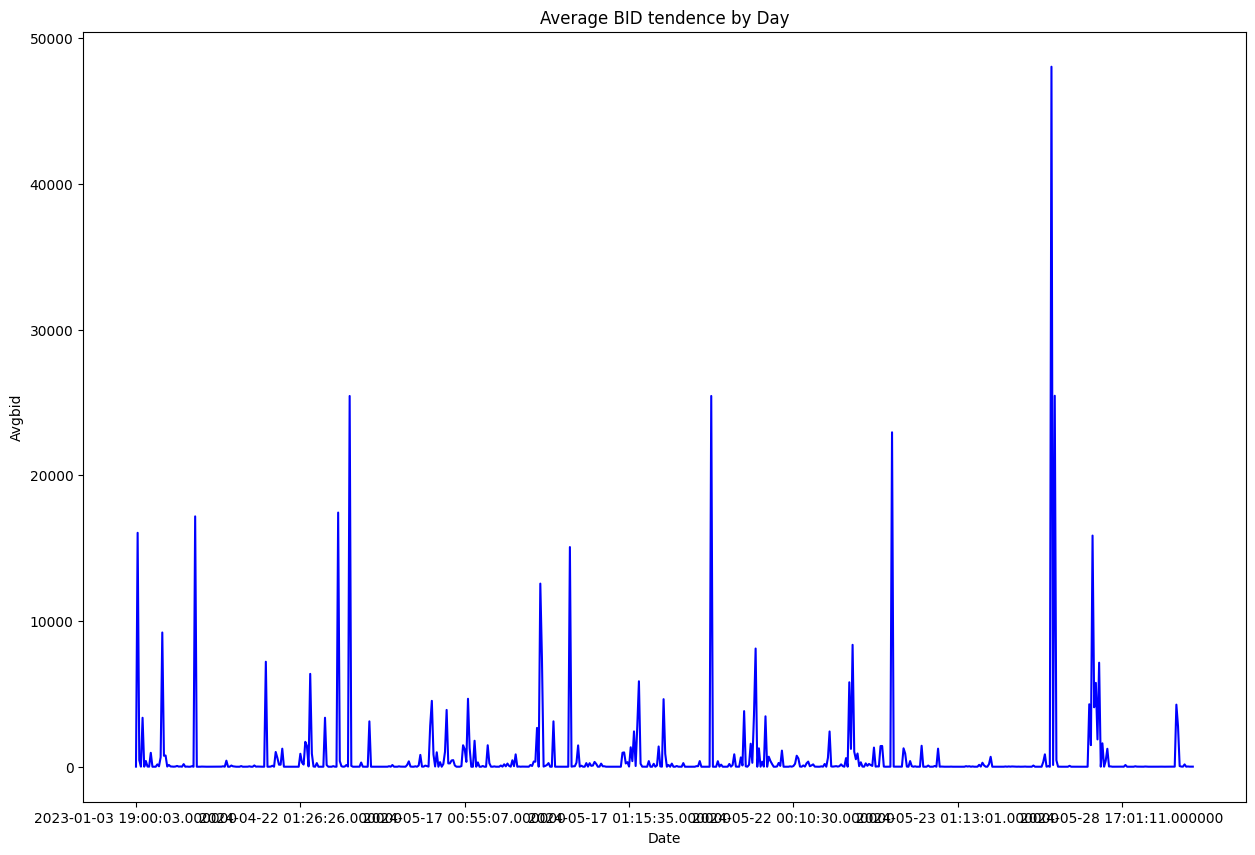

In [16]:
import matplotlib.pyplot as plt

query = """
    SELECT 
        create_date DT_REF
        ,round(avg(ask),2) AvgAsk
        ,round(avg(bid),2) Avgbid
    FROM df 
    where not code in ('BTC', 'ETH', 'LTC', 'DOGE')
    group by 1
    order by 1 
"""

newDf = sqldf(query, locals())
newDf.sort_values(by="DT_REF", ascending=True, inplace=True)

cht = newDf.plot(
    kind="line",
    x="DT_REF",
    y="Avgbid",
    figsize=(15, 10),
    legend=False,
    color="blue",
    title="Average BID tendence by Day",
    xlabel="Date",
    ylabel="Avgbid",
)

# exibir o grafico
plt.show()